In [1]:
import os
import math
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

import ngrams
import mcmc

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yaoda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\yaoda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yaoda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\yaoda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
file_path = os.path.join(os.getcwd(), '..', 'data', 'pg2554.txt')

df_char_1 = ngrams.load_ngrams(file_path, 'char', 1)
df_char_2 = ngrams.load_ngrams(file_path, 'char', 2)

df_word_1 = ngrams.load_ngrams(file_path, 'word', 1)
df_word_2 = ngrams.load_ngrams(file_path, 'word', 2)

first,,a,b,c,d,e,f,g,h,i,...,q,r,s,t,u,v,w,x,y,z
second,,,,,,,,,,,,,,,,,,,,,
,0.001633,0.091862,0.004561,0.008261,0.558415,0.330259,0.306239,0.374008,0.086503,0.060613,...,0.007614,0.210744,0.324245,0.289930,0.131411,0.099397,0.123346,0.060105,0.516199,0.008280
a,0.122358,0.000918,0.049523,0.119566,0.032422,0.049655,0.086517,0.088667,0.187287,0.025644,...,0.000000,0.076110,0.040890,0.038854,0.013066,0.056451,0.233797,0.175056,0.033665,0.160994
b,0.040995,0.019272,0.007249,0.000106,0.004337,0.003027,0.000814,0.001902,0.000732,0.006674,...,0.000000,0.002536,0.003551,0.001336,0.014145,0.000360,0.000571,0.000751,0.005306,0.000000
c,0.033795,0.025943,0.000000,0.015621,0.001735,0.020815,0.001512,0.000869,0.000696,0.034139,...,0.000000,0.008411,0.011774,0.010703,0.029550,0.000630,0.000999,0.167543,0.004085,0.000920
d,0.031023,0.046390,0.000407,0.000106,0.019004,0.087402,0.000872,0.001195,0.000393,0.045076,...,0.000000,0.028263,0.001140,0.000804,0.028687,0.010714,0.004140,0.000000,0.003991,0.000000
e,0.016254,0.000122,0.366539,0.178766,0.107903,0.031171,0.081400,0.096273,0.432070,0.027384,...,0.000000,0.229380,0.113738,0.088559,0.019112,0.553615,0.129961,0.111195,0.055733,0.139834
f,0.034177,0.007023,0.000244,0.000053,0.002194,0.010746,0.044189,0.001576,0.000839,0.018634,...,0.000000,0.009606,0.002112,0.001596,0.004463,0.000270,0.002712,0.000000,0.003944,0.000000
g,0.016328,0.016976,0.000000,0.000053,0.006734,0.007091,0.000756,0.009779,0.000107,0.027241,...,0.000000,0.009256,0.001626,0.000495,0.060289,0.000450,0.000619,0.000000,0.001409,0.000000
h,0.089575,0.002890,0.000000,0.163039,0.005306,0.005254,0.002965,0.151092,0.000910,0.006084,...,0.000000,0.006494,0.072268,0.282840,0.000612,0.000630,0.181403,0.019534,0.004742,0.104876


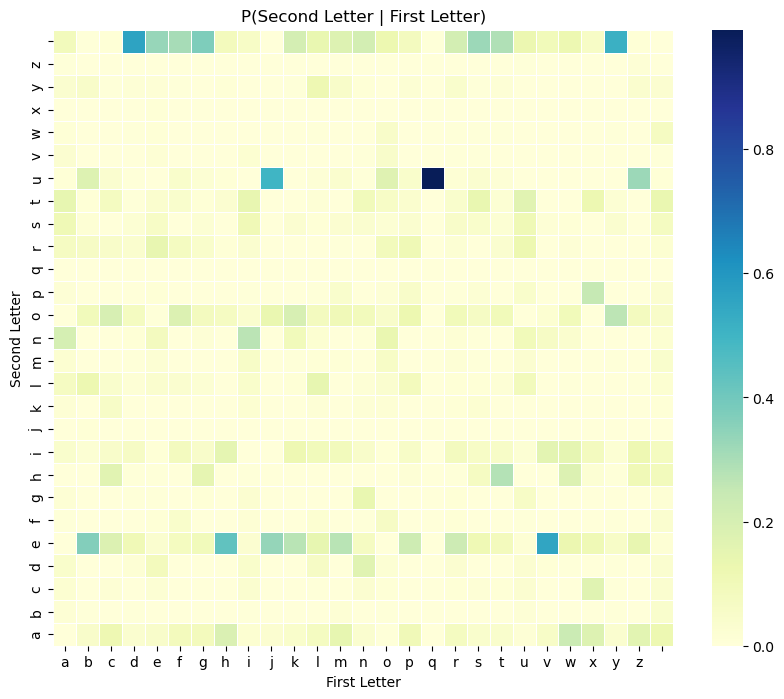

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

# Suppose this is your original DataFrame
data = df_char_2
df = pd.DataFrame(data)

# If your 2-grams are supposed to be two characters each, 
# you want to extract the first and second characters.
# (Here we check that the 2-gram has length 2 and handle cases otherwise.)
def extract_letters(two_gram):
    # If two_gram is not length 2, for example a single character, 
    # you might decide to assign a placeholder (like a space or ignore it)
    if len(two_gram) == 2:
        return pd.Series([two_gram[0], two_gram[1]])
    elif len(two_gram) == 1:
        # For example, assume that a single letter means it's paired with a space
        return pd.Series([two_gram[0], ' '])
    else:
        # Handle unexpected length if needed
        return pd.Series([None, None])

df[['first', 'second']] = df['2-gram'].apply(extract_letters)

# Create the full 27-element alphabet that includes 26 letters plus a space.
# (Modify the extra character as appropriate to your data.)
alphabet = list(string.ascii_lowercase) + [' ']

# Now create a pivot table where rows are the first character and columns are the second.
# We use frequency (or count if you prefer) as the values.
heatmap_data = df.pivot_table(index='second', columns='first', values='frequency', fill_value=0)
heatmap_data = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)

display(heatmap_data)

# Reindex the DataFrame to ensure it is 27x27, adding any missing rows/columns.
heatmap_data = heatmap_data.reindex(index=alphabet, columns=alphabet, fill_value=0)
# Plotting the heat map using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, annot=False)
plt.title("P(Second Letter | First Letter)")
plt.xlabel("First Letter")
plt.ylabel("Second Letter")
plt.gca().invert_yaxis()
plt.show()

In [6]:
display(df_char_1)
display(df_char_2)

,1-gram,count,frequency
0,,188635,0.175010
1,e,105066,0.097477
2,t,80816,0.074979
3,a,74046,0.068698
4,o,72245,0.067027
5,n,63162,0.058600
6,i,62627,0.058104
7,h,56021,0.051975
8,s,53510,0.049645
9,r,48509,0.045005


,2-gram,count,frequency
0,e,34699,3.219282e-02
1,t,25463,2.362390e-02
2,he,24205,2.245676e-02
3,t,23431,2.173867e-02
4,a,23081,2.141395e-02
...,...,...,...
610,kz,1,9.277737e-07
611,xb,1,9.277737e-07
612,mj,1,9.277737e-07
613,hz,1,9.277737e-07


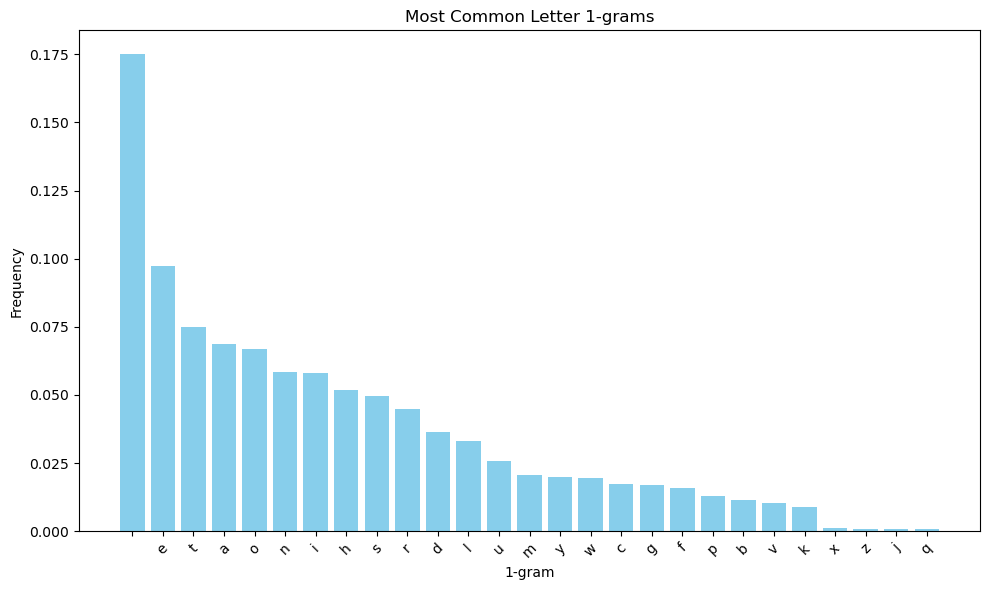

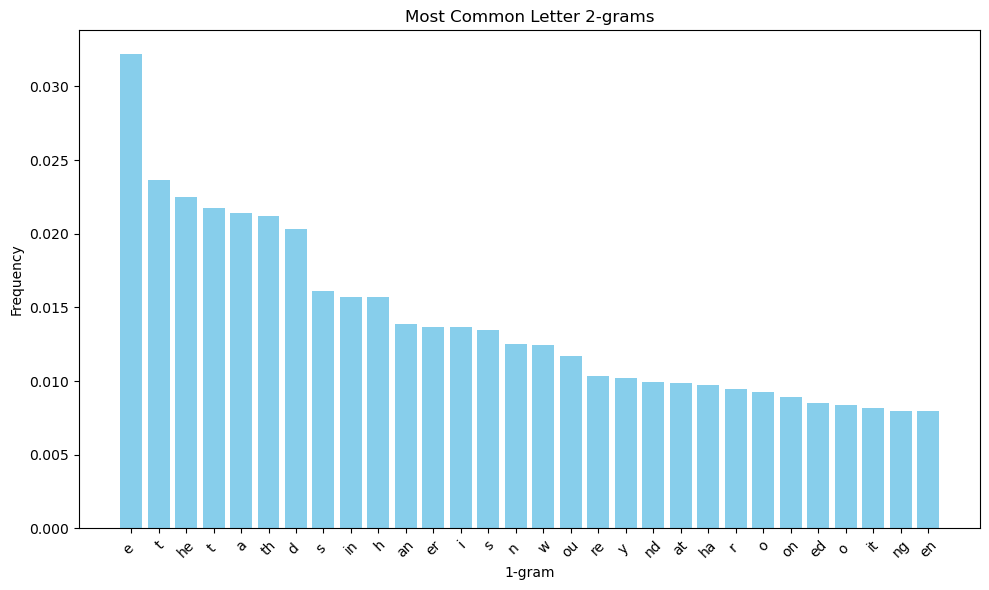

In [4]:
df_char_1_top = df_char_1.head(30)

plt.figure(figsize=(10,6))
plt.bar(df_char_1_top['1-gram'], df_char_1_top['frequency'], color='skyblue')
plt.xlabel("1-gram")
plt.ylabel("Frequency")
plt.title("Most Common Letter 1-grams")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df_char_2_top = df_char_2.head(30)

plt.figure(figsize=(10,6))
plt.bar(df_char_2_top['2-gram'], df_char_2_top['frequency'], color='skyblue')
plt.xlabel("1-gram")
plt.ylabel("Frequency")
plt.title("Most Common Letter 2-grams")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

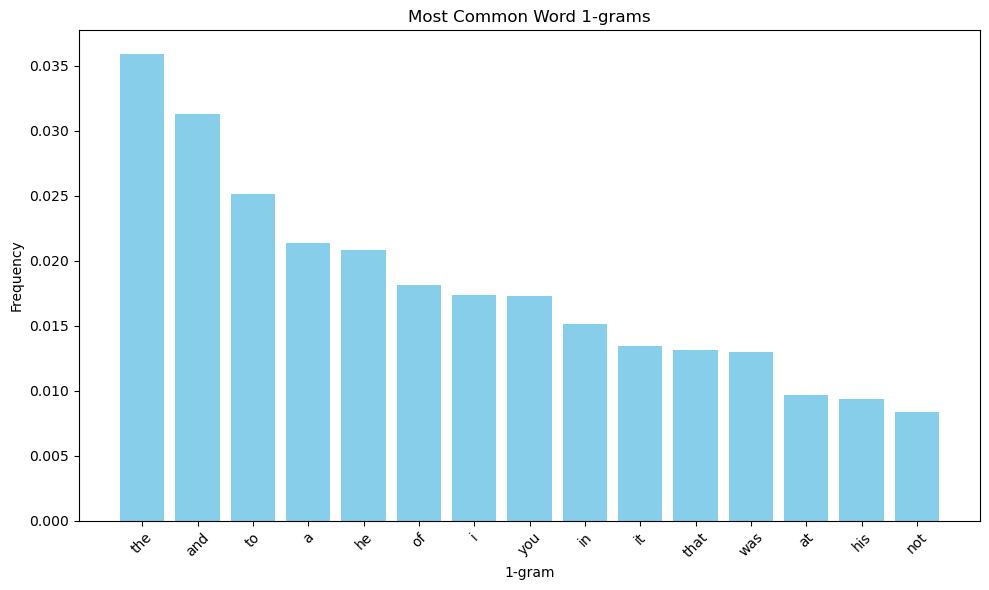

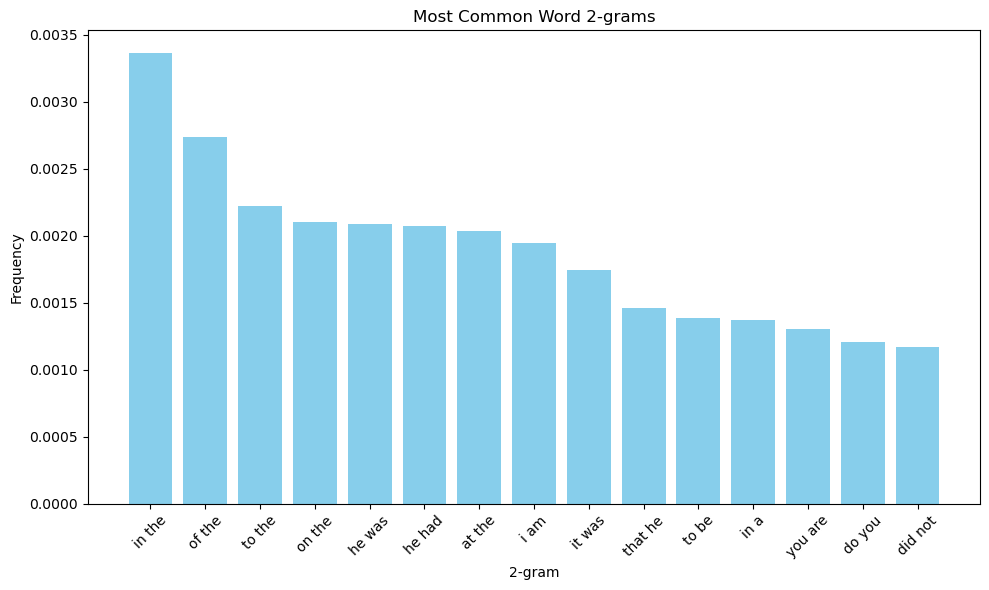

In [5]:
df_word_1_top = df_word_1.head(15).copy()
df_word_1_top.loc[:, '1-gram'] = df_word_1_top['1-gram'].apply(lambda x: ' '.join(x) if isinstance(x, tuple) else x).str.lower()

plt.figure(figsize=(10,6))
plt.bar(df_word_1_top['1-gram'], df_word_1_top['frequency'], color='skyblue')
plt.xlabel("1-gram")
plt.ylabel("Frequency")
plt.title("Most Common Word 1-grams")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df_word_2_top = df_word_2.head(15).copy()
df_word_2_top.loc[:, '2-gram'] = df_word_2_top['2-gram'].apply(lambda x: ' '.join(x) if isinstance(x, tuple) else x).str.lower()

plt.figure(figsize=(10,6))
plt.bar(df_word_2_top['2-gram'], df_word_2_top['frequency'], color='skyblue')
plt.xlabel("2-gram")
plt.ylabel("Frequency")
plt.title("Most Common Word 2-grams")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
df_char_3 = ngrams.load_ngrams(file_path, 'char', 5)
text1 = ngrams.generate_text(df_char_3, 'char', 5, 100)
print(text1)

df_word_3 = ngrams.load_ngrams(file_path, 'word', 3)
text2 = ngrams.generate_text(df_word_3, 'word', 3, 30)
print(text2)

100%|██████████| 95/95 [00:03<00:00, 24.85it/s]


y alyona disas irreproachflashe hatedbusiness anotherewith mist out the stility mother blood also th


100%|██████████| 27/27 [00:03<00:00,  7.83it/s]

and printed and given awayyou maydo practically anything in deliriumi should think so too pulcheria alexandrovna yesterday in the very titles are worth the sole of his weakness for highflown


In [4]:
P = {row['1-gram']: row['frequency'] for _, row in df_char_1.iterrows()}
Q = {tuple(row['2-gram']): row['frequency'] for _, row in df_char_2.iterrows()}

alphabet = list("abcdefghijklmnopqrstuvwxyz ")
permutation = alphabet.copy()
random.shuffle(permutation)

sigma = {k: v for k, v in zip(alphabet, permutation)}

# text = "It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way—in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only."

text = "Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal. Now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We are met on a great battle-field of that war. We have come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It is altogether fitting and proper that we should do this. But, in a larger sense, we can not dedicate—we can not consecrate—we can not hallow—this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It is rather for us to be here dedicated to the great task remaining before us—that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion—that we here highly resolve that these dead shall not have died in vain—that this nation, under God, shall have a new birth of freedom—and that government of the people, by the people, for the people, shall not perish from the earth."

alphabet = set(alphabet)
text = text.lower()
text = "".join(a for a in text if a in alphabet)

scrambled_text = "".join([sigma.get(symbol, symbol) for symbol in text])

state_chain, energy_chain, best_perm, best_energy = mcmc.metropolis_hastings(scrambled_text, P, Q, mcmc.energy_function_aristocrat, mcmc.propose_permutation_aristocrat, beta=0.5, n=10**5, perm=None, return_chain=True)

best_perm = mcmc.inv_perm(best_perm)
decoded_text = "".join([best_perm.get(symbol, symbol) for symbol in scrambled_text])

print(f"Scrambled text: \n{scrambled_text}\n")
print(f"Best energy: \n{best_energy}\n")
print(f"Decoded text: \n{decoded_text}")
print(f"Decoded: \n{decoded_text == text}")

100%|██████████| 110000/110000 [00:11<00:00, 9367.57it/s] 

Scrambled text: 
rj nqsxjndqoiaqsdldiqcdonsqotjqj nqrowednsqbnj tewqrjnweqjiqweksqxjiwkidiwqoqidhqiowkjiqxjixdkldaqkiqykbdnwcqoiaqadakxowdaqwjqwedqmnjmjskwkjiqweowqoyyqvdiqondqxndowdaqdg oyqijhqhdqondqditotdaqkiqoqtndowqxklkyqhonqwdswkitqhedwednqweowqiowkjiqjnqoicqiowkjiqsjqxjixdkldaqoiaqsjqadakxowdaqxoiqyjitqdia ndqhdqondqvdwqjiqoqtndowqbowwydrkdyaqjrqweowqhonqhdqeoldqxjvdqwjqadakxowdqoqmjnwkjiqjrqweowqrkdyaqosqoqrkioyqndswkitqmyoxdqrjnqwejsdqhejqedndqtoldqwedknqykldsqweowqweowqiowkjiqvktewqykldqkwqksqoywjtdwednqrkwwkitqoiaqmnjmdnqweowqhdqsej yaqajqweksqb wqkiqoqyontdnqsdisdqhdqxoiqijwqadakxowdhdqxoiqijwqxjisdxnowdhdqxoiqijwqeoyyjhweksqtnj iaqwedqbnoldqvdiqyklkitqoiaqadoaqhejqswn ttydaqedndqeoldqxjisdxnowdaqkwqronqobjldqj nqmjjnqmjhdnqwjqoaaqjnqadwnoxwqwedqhjnyaqhkyyqykwwydqijwdqijnqyjitqndvdvbdnqheowqhdqsocqedndqb wqkwqxoiqidldnqrjntdwqheowqwedcqakaqedndqkwqksqrjnq sqwedqyklkitqnowednqwjqbdqadakxowdaqedndqwjqwedq irkiksedaqhjnzqhekxeqwedcqhejqrj tewqedndqeoldqwe sqronqsjqijbycqoaloix

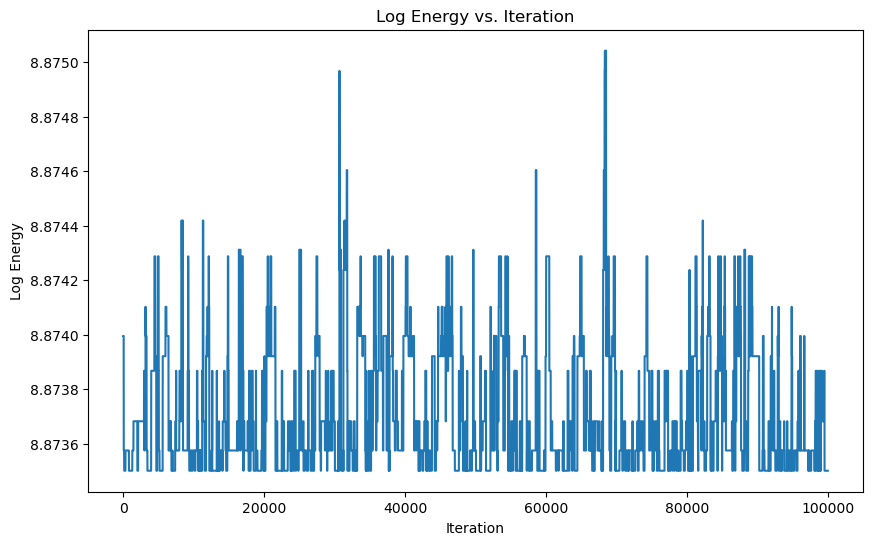

In [22]:
energy_chain = np.array(energy_chain)
energy_chain = np.log(energy_chain)

plt.figure(figsize=(10, 6))
plt.plot(energy_chain)
plt.xlabel("Iteration")
plt.ylabel("Log Energy")
plt.title("Log Energy vs. Iteration")
plt.show()

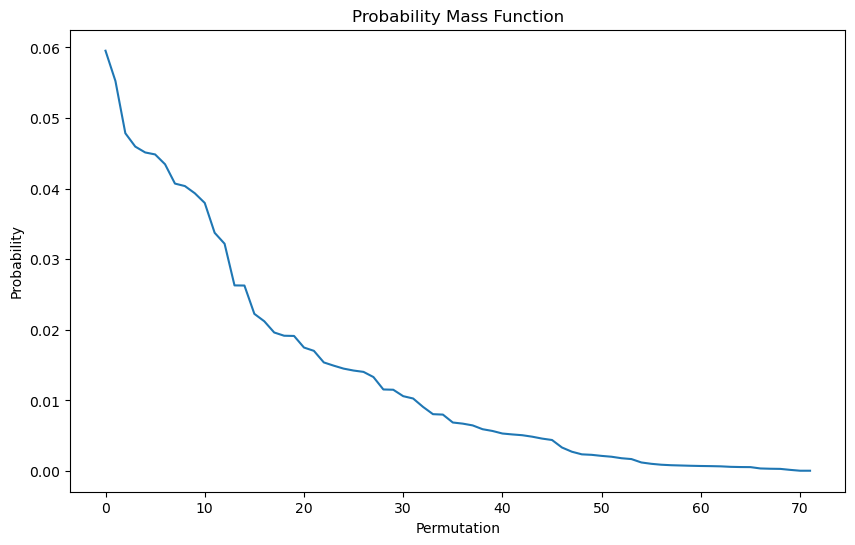

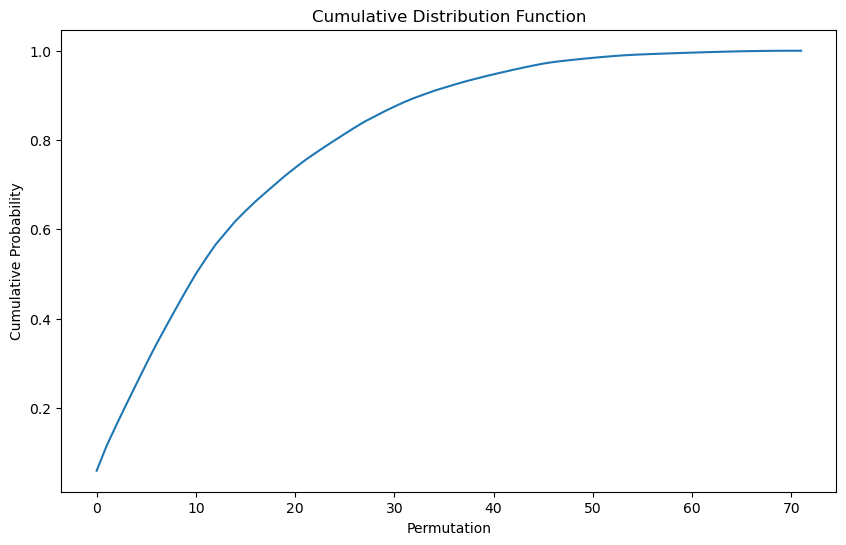

In [23]:
pmf = []
cdf = []

count = Counter([tuple(perm.items()) for perm in state_chain])
count = count.most_common(len(count))

for _, cnt in count:
    pmf.append(cnt / len(state_chain))
    cdf.append(sum(pmf))

plt.figure(figsize=(10, 6))
plt.plot(range(len(count)), pmf)
plt.xlabel("Permutation")
plt.ylabel("Probability")
plt.title("Probability Mass Function")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(count)), cdf)
plt.xlabel("Permutation")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function")
plt.show()

In [ ]:
# print(decoded_text == text)

# for perm, _ in count:
#     perm = mcmc.inv_perm(dict(perm))
#     decoded_text = "".join([perm.get(symbol, symbol) for symbol in scrambled_text])
#     print(f"Decoded text: \n{decoded_text}\n")

In [16]:
def vigenere_cipher(text, key):
    """
    Encrypts a text using the Vigenere cipher.

    Parameters:
        text (str): The text to encrypt.
        key (str): The key to use for encryption.
    
    Returns:
        str: The encrypted text.
    """
    alphabet = list("abcdefghijklmnopqrstuvwxyz ")
    sigma = np.ndarray(len(key), dtype=dict)

    for i, char in enumerate(key):
        j = alphabet.index(char)
        sigma[i] = {k: v for k, v in zip(alphabet, alphabet[j:] + alphabet[:j])}

    cipher = np.zeros(len(text), dtype=str)
    
    for i, char in enumerate(text):
        cipher[i] = sigma[i % len(key)].get(char)

    return "".join(cipher)

def vigenere_decipher(text, key):
    """
    Decrypts a text using the Vigenere cipher.

    Parameters:
        text (str): The text to decrypt.
        key (str): The key to use for decryption.
    
    Returns:
        str: The decrypted text.
    """
    alphabet = list("abcdefghijklmnopqrstuvwxyz ")
    sigma = np.ndarray(len(key), dtype=dict)

    for i, char in enumerate(key):
        j = len(alphabet) - alphabet.index(char)
        sigma[i] = {k: v for k, v in zip(alphabet, alphabet[j:] + alphabet[:j])}

    decipher = np.zeros(len(text), dtype=str)
    
    for i, char in enumerate(text):
        decipher[i] = sigma[i % len(key)].get(char)

    return "".join(decipher)

In [17]:
text = "it was the epoch of belief it was the epoch of incredulity"
key = "abc"
encoded_text = vigenere_cipher(text, key)
decoded_text = vigenere_decipher(encoded_text, key)

print(f"Text: {text}")
print(f"Key: {key}")
print(f"Encoded text: {encoded_text}")
print(f"Decoded text: {decoded_text}")
print(f"Decoded: {decoded_text == text}")

Text: it was the epoch of belief it was the epoch of incredulity
Key: abc
Encoded text: iubwbu ujeagppehaqfademkegbiubwbu ujeagppehaqfakndteewljvy
Decoded text: it was the epoch of belief it was the epoch of incredulity
Decoded: True


In [19]:
def energy_function(decoded_text, P, Q):
    """
    Computes the energy of a permutation given a scrambled text and n-gram probabilities.

    Parameters:
        perm (dict): The permutation to evaluate.
        scrambled_text (str): The scrambled text.
        P (dict): The unigram probabilities.
        Q (dict): The bigram probabilities.

    Returns:
        float: The energy of the permutation.
    """
    epsilon = 1e-12
    energy = -math.log(P.get(decoded_text[0], epsilon))

    for j in range(len(decoded_text) - 1):
        bigram = (decoded_text[j], decoded_text[j+1])
        energy = energy - math.log(Q.get(bigram, epsilon))
    
    return energy

def propose_key(key):
    """
    Proposes a new key by randomly changing a character in the current key.

    Parameters:
        key (str): The current key.

    Returns:
        str: The proposed key.
    """
    alphabet = list("abcdefghijklmnopqrstuvwxyz ")
    key = list(key)
    i = random.randint(0, len(key) - 1)
    j = random.randint(0, len(alphabet) - 1)
    key[i] = alphabet[j]

    return "".join(key)

def metropolis_step(key, scrambled_text, P, Q, beta=1, old_energy=math.inf, old_keys=dict()):
    """
    Performs a single step of the Metropolis-Hastings algorithm.

    Parameters:
        key (str): The current key.
        scrambled_text (str): The scrambled text.
        P (dict): The unigram probabilities.
        Q (dict): The bigram probabilities.
        beta (float): The inverse temperature. Default is 1.
        old_energy (float): The energy of the current deciphered text. Default is infinity.
        old_keys (dict): The previously visited keys. Default is an empty dictionary.

    Returns:
        str: The new key.
        float: The energy of the new deciphered test.
        dict: The updated dictionary of previously visited keys.
    """
    new_key = propose_key(key)
    
    if new_key in old_keys:
        new_energy = old_keys[new_key]
    else:
        new_energy = energy_function(vigenere_decipher(scrambled_text, new_key), P, Q)
        old_keys[new_key] = new_energy

    E_delta = new_energy - old_energy

    if E_delta < 0 or random.random() < math.exp(-beta * E_delta):
        return new_key, new_energy, old_keys
    
    return key, old_energy, old_keys

def metropolis_hastings(scrambled_text, P, Q, key_length, key=None, beta=1, n=10**5, burn_in=10**4, return_chain=False):
    """
    Runs the Metropolis-Hastings algorithm to decode a scrambled text.

    Parameters:
        scrambled_text (str): The scrambled text.
        P (dict): The unigram probabilities.
        Q (dict): The bigram probabilities.
        key_length (int): The length of the key.
        key (str): The initial key. Default is None (which becomes identity).
        beta (float): The inverse temperature. Default is 1.
        n (int): The length of the chain to be returned. Default is 1e5.
        return_chain (bool): Whether to return the chain. Default is False.
    
    Returns:
        list: The chain of keys.
        list: The chain of energies.
        dict: The best key found.
        float: The energy of the best key.
    """
    if key is None:
        key = "a" * key_length

    energy = math.inf
    old_keys = dict()

    best_key = key
    best_energy = energy

    if return_chain:
        state_chain = []
        energy_chain = []

        for _ in tqdm(range(n+burn_in)):
            key, energy, old_keys = metropolis_step(key, scrambled_text, P, Q, beta, energy, old_keys)
            state_chain.append(key)
            energy_chain.append(energy)

            if energy < best_energy:
                best_key = key
                best_energy = energy
        
        return state_chain[burn_in:], energy_chain[burn_in:], best_key, best_energy

    for _ in tqdm(range(n+burn_in)):
        key, energy, old_keys= metropolis_step(key, scrambled_text, P, Q, beta, energy, old_keys)

        if energy < best_energy:
            best_key = key
            best_energy = energy
    
    return None, None, best_key, best_energy

In [21]:
P = {row['1-gram']: row['frequency'] for _, row in df_char_1.iterrows()}
Q = {tuple(row['2-gram']): row['frequency'] for _, row in df_char_2.iterrows()}

text = "all happy families are alike each unhappy family is unhappy in its own way"
text = text.lower()
text = "".join(a for a in text if a in alphabet)
key = "tolstoy"
key = key.lower()
key = "".join(a for a in key if a in alphabet)
encoded_text = vigenere_cipher(text, key)

state_chain, energy_chain, best_key, best_energy = metropolis_hastings(encoded_text, P, Q, len(key), None, beta=0.5, n=10**5, burn_in=0, return_chain=True)

decoded_text = vigenere_decipher(encoded_text, best_key)

print(f"Text: {text}")
print(f"Key: {key}")
print(f"Encoded text: {encoded_text}")
print(f"Best key: {best_key}")
print(f"Best energy: {best_energy}")
print(f"Decoded text: {decoded_text}")
print(f"Decoded: {decoded_text == text}")

100%|██████████| 100000/100000 [00:00<00:00, 185778.15it/s]

Text: all happy families are alike each unhappy family is unhappy in its own way
Key: tolstoy
Encoded text: tzwr omhlkxt fdwpjsooxnlcaybsslu nrfvlghlxyox dlxafklfvyhciraaxagcrgjksjlp
Best key: tolstoy
Best energy: 412.31999781074836
Decoded text: all happy families are alike each unhappy family is unhappy in its own way
Decoded: True


In [32]:
key0 = 'a'*len(key)
key1 = state_chain[0]
key10 = state_chain[9]
key100 = state_chain[99]
key1000 = state_chain[999]
key10000 = state_chain[9999]

print(key0)
print(key1)
print(key10)
print(key100)
print(key1000)
print(key10000)

print(vigenere_decipher(encoded_text, key0))
print(vigenere_decipher(encoded_text, key1))
print(vigenere_decipher(encoded_text, key10))
print(vigenere_decipher(encoded_text, key100))
print(vigenere_decipher(encoded_text, key1000))
print(vigenere_decipher(encoded_text, key10000))

aaaaaaa
aaaaada
akaaadg
todsavg
tolstvg
tolstoy
tzwr omhlkxt fdwpjsooxnlcaybsslu nrfvlghlxyox dlxafklfvyhciraaxagcrgjksjlp
tzwr lmhlkxtxfdwpjsloxnlcavbsslu krfvlghixyox dixafklfsyhcirayxagcrggksjlp
tpwr lghbkxtx dmpjslixdlcavwsilu klfllghiryex dirawklfsshtirayraxcrgges lp
alt  ugpyhftf limssuie iladw eic tlnhiphrrfauidrrishufasppf agrit  gpe wiy
all hugpy faf lies uie alidw eachtlnhapprrfamilrris unasppy igrits ope way
all happy families are alike each unhappy family is unhappy in its own way


In [25]:
P = {row['1-gram']: row['frequency'] for _, row in df_char_1.iterrows()}
Q = {tuple(row['2-gram']): row['frequency'] for _, row in df_char_2.iterrows()}

text = "It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way—in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only."
text = text.lower()
text = "".join(a for a in text if a in alphabet)

N = len(text)

# Compute unique key lengths.
# For every divisor-like index n (from 1 to N), we compute key length as int(N / n)
# Using a set helps ensure only unique key lengths are kept.
unique_key_lengths = sorted({int(N / n) for n in range(1, N + 1)}, reverse=True)

# Open an output file to save all printed results.
with open("output.txt", "w") as f:
    # Iterate over each unique key length.
    for key_length in unique_key_lengths:
        # Generate a random key of the selected length.
        key = "".join(random.choice(alphabet) for _ in range(key_length))
        # Encrypt the text using the Vigenère cipher.
        encoded_text = vigenere_cipher(text, key)

        # Run metropolis hastings with your parameters.
        # (Adjust beta, n, and burn_in as necessary for your use case.)
        state_chain, energy_chain, best_key, best_energy = metropolis_hastings(
            encoded_text, P, Q, len(key), None, beta=0.5, n=10**5, burn_in=0, return_chain=True
        )

        # Decrypt the text using the best key found.
        decoded_text = vigenere_decipher(encoded_text, best_key)

        # Format the output string.
        output = (
            f"Key length: {key_length}\n"
            f"Random Key: {key}\n"
            f"Best key from M-H: {best_key}\n"
            f"Best energy: {best_energy}\n"
            f"Decoded text: {decoded_text}\n"
            f"Decoded correctly: {decoded_text == text}\n"
            f"{'-'*40}\n"
        )

        # Print the output to the console.
        print(output)
        # Write the output to the file.
        f.write(output)

100%|██████████| 100000/100000 [09:58<00:00, 166.99it/s]


Key length: 592
Random Key: otzaizds rbjxpgfjxav vxfubsagkzokfljpwyupqiuunwkmtggwydtsdnnkjhaifxfnst upd ttsrebqsijxeqvhoqqqxpjlmzvkrtlkgmjmgwxphckei ehy ddzkykf qaskhlpohcxexkn bqattmmeh izzkwws rxzuov hnpbgmfofpmcustewvrvvsjrjlovvtekhrzjownna  cfgjjcrslonlvinzzpkorncjoofsussgduvczxgnxyfyesemaqrtcpgebxsblgpsk nhntlrj uvytqdfiivwsquxdwzwogzyylsnngzjavqiqdvo gmzypemg lditcvqmyskjrigxisicgjonjxdqed vcih ltkmmzeopvhxnhpfwqqrsxbpfgrtumcjdibydbnwpfktnkourxtcpmsawsdmebudcyjihqtwxvxisqwbbxszqjwjrsomoquoinsswjvlmydxavwhylujyznlqwacyjetgrustbooqhe vprepjieitavx cmnhukmauyaovqqcgzeuusbkqluijgdammlofnkxckwrse csfabfkckrtfckb
Best key from M-H: fzzuqmdxvwvddef jjanehamlkdmjdywvkwqgkludqc ivrirsnpalvzfcggwqicuechbousxqxvjh bulxihwxji dcncwfmcuyghpukte goiawcsucgpjogpthpedcmyxmgfaghqpopzdqdhx teztu ywldekzdbo byx qotlh ebexauflzkrx tymnwvgwsf vwqhjxfurwzabroytlvhnpuhhclxujqrlneaeebqybginjlmyogjzrpvbbjugdluvyqxgs yilaewqgpklcwedljpvcpim sckfzhbmhsoeeiiwygtqhcabg osjzchunncldduuehhixhkhuwomuwbnwxgdxnck

100%|██████████| 100000/100000 [06:00<00:00, 277.50it/s]


Key length: 296
Random Key: avijlcwprwjzcvzpkpwjqrbilfwgzivvqthixqwcafa haxnuipasssxurxjmtjzdiod gnvvvtxmagw kjkdiygcfxrqwrevymbjdetkqkrzbtzqxscaynricnuevb n lornduveagfzg gcjxowaqmkchrhsxeeotmtukalorapvpbngmtfqovpzgzvprxobyizlvtojgbysmmtzonijeeqlbqrcqzhlkhgcrwhoybk dajxzbofshgmjcnxnbfffskbtpytekhlrxjnubltrtdmgybwqxzyuishf
Best key from M-H: exijlcdhjavacwkwycccqm wlfbgqejaqtheee uafif tzioswjwjajskhojorfeworsypnysfbvbgw pjkrwpwlwjfvirevphnmdekpq wmdcnmjucayjflceqkudwzalsfvjutefayty jzyrswtompqwiylrp znmzuowdtnpq tusgshgpphorovbprxttmjzcvtobypqxxm mgnmxlp lperfsudayhkrrwl pbjpdwhxsqmssjhtrlmegqcaqhtvwmkgtbtljtceqnltkogsfcomhgzyuwshz
Best energy: 3182.6162761075243
Decoded text: er wassap o erhtast irge in eeduthedo nat g hagrkit pinougichet dmosheg ar v s wan turilyon anfooungenean tomurddgfe et  his a i heblan yanfann bt id wh d o ok anid ctwaindeg w  am mantatakat ioih sitheharindntan  nk deed fre le pte od ior th o rs gstosts thelte bunarise thrvowegmyya io othi g iadore m hrtyh st 

100%|██████████| 100000/100000 [05:03<00:00, 329.92it/s]


Key length: 197
Random Key: xsrzwdofjexeoqkdxrqs pfduxvgdqzk aigohxgzwfdqngzcuqlnrjwuwdctptaiipimjovcundcbnyyccvpmrkynbycxml drrnwfhsfkreencsjwtkbtzkkuvjllzmvvnwixeyivcgxzdvqywldviktjexaetbrrr ajj ktap lccwrqxbfql rnlgngteezk
Best key from M-H: xsrzwcofjexeoqzzlrhlmtgrgfsfmrvb aiggeogzweeqnolgvhmfcswmndcxdpaiilotycvzuficrnqqhozhmrclnbhienzcd vbwjmk kreivqsjwtkbh t acay dmc ewlxetwjcgekdvrmmedqxstjdcudwafrpgsjjvttapzxyqarqxbfqrgvnpgbgteemg
Best energy: 3091.5141043954027
Decoded text: it wat the besee fi widen wan withe dr st pe ta arihaona ithalege s thushouvid dinoppe ite e seall otnan fit ste the eanustgonn la o ft and t t eo mo trsindllermut trt ass titee ason o thiche it ies theaseason orepa raaren wan withe  s inganf  bldihaona ithal intilt r he katrhd odid mheron h d taron h s wasuad notthertunt mespa te arce t l f sugeparedngulateconn aw westengl goinat ineot thrdotherawayin sh we boswore rervea so nd  lild t swo d tethyere h thentd mi wa tt hice ie f akn ndft ad ei oste san its

100%|██████████| 100000/100000 [04:18<00:00, 386.92it/s]


Key length: 148
Random Key: izuufribfjnsmrvktazcbifatkjbrjephcgzk hlbjwywltemyjzkbczb lwkzwpzfohhmmoigejq fatvdwzvewfdoud iyobnxuazoqxfnfodbzfe yqplfoxujaf vxexov nenurjgd cidr
Best key from M-H: izuufribfjnsmrvktazcfvtatkjbrjepwcgzk hlbqwywlbtmyjzkbczg lwkzwpzfbvermoigejq fatvdwzveujdoud iyobnxbqzoqxfnfodqzfe yqplooxvxhclvxexocfninurugd cida
Best energy: 3008.7636131312097
Decoded text: it was the best of te rs it was ehe worsttof t yes it wan the age ascrisdom it was the cce of foolis yess it wad the epouh nstetlief an sas ihe epoth of incredulity it soe the seas n of ligat itrhas the s ason of dndniess it was the spteng of hope ad was the hinter ofrderbulf we hty avernthing sefore us we had notheat before ud we weretall y ing direyt to heavr cre were all going ferect the ot pr wayin stort the gerhaxckas sos an li e the fresent period that sk r of its n isiest anthor eies insinted on iteme ing received for ikod or for entl in the duperlatime cr ute of vimlarihon onlo
Decoded correctl

100%|██████████| 100000/100000 [03:30<00:00, 474.52it/s]


Key length: 118
Random Key: deajvfhaubnhleyupfrbtqnnezgiavepcaxvrdugkzlpsszspfozttk zafuluds  ezgwndnnwkzhinlrsygubfk dgvpncmqomdmgehryqhzzyiskail
Best key from M-H: deajvfhaubnhleyupfrbtqnnezgiavepcaxvysugkzlpsszspfozttk zafuluns  ezg ndinwkzhinlrsygubfk dgvpncmhf hmgehryqhzzyiskail
Best energy: 2975.0293233616867
Decoded text: it was the best of times it was the p rst of times it was the rge of sisiom it was the age of foouredness it was the epoch of belief it was the epoch of igoredulity it was the seasen of leghy it was the season of da t ass it was the spring of hope it was the winter of desimir we had everything befere us se mad nothing before us we enda all going direct to heaven we were all going direct mte other wayin short the feriod saseso far like the present yndeod that some of its noisiest authorities insisted on bes being received for goou or fon e il in the superlative dep ra of comparison only
Decoded correctly: False
----------------------------------------



100%|██████████| 100000/100000 [54:37<00:00, 30.51it/s]   


Key length: 98
Random Key: zghamwlijqgnvmebey xetvhwhzegk an klfecrnwvtfawmntzliwwkwkvrdvqpbunemmhwvjxgnozgsyprwokjcbvmxueqjy
Best key from M-H: zghamwlijqgnvmebey xetvhwhzegk an klfecrnwvtfawmntzliwwkwkvrdvqpbunemmhovjxgnozgsyprwokjcbvmxueqjy
Best energy: 2968.0380786991045
Decoded text: it was the best of times it was the worst of times it was the age of wi dom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it wis the season of light it was the season of darkness it was the spring of hope it was the winter on despair we had everything before us we had nothing before us we were all going direct to heaven de were all going direct the other wayin short the period was so far like the present period that  ome of its noisiest authorities insisted on its being received for good or for evil in the superlitive degree of comparison only
Decoded correctly: False
----------------------------------------



100%|██████████| 100000/100000 [01:16<00:00, 1313.49it/s]


Key length: 84
Random Key: nsecqqslljobgijmvatpveigzripqonyskzlrmttktaanl suyuncoomouwiscewdgihqhytdakqmhttqlyi
Best key from M-H: nsecqqslljobgijmvatpveigzripqonyskzlrmttktaanl suyuncoomouwiscewdgihqhytdakqmhttqlyi
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:31<00:00, 3145.21it/s]


Key length: 74
Random Key: pbtldmgolrzwut vkkizfzmzosrafehrktdiownaqaempxoaehglhstuf bbiphmkvbmkbpqfd
Best key from M-H: pbtldmgolrzwut vkkizfzmzosrafehrktdiownaqaempxoaehglhstuf bbiphmkvbmkbpqfd
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:12<00:00, 8109.94it/s] 


Key length: 65
Random Key: kfkaspataenfbsgasxzmaptsizvaqmnxthoajzmjjxouwaemumwgr fyeyfmxikyv
Best key from M-H: kfkaspataenfbsgasxzmaptsizvaqmnxthoajzmjjxouwaemumwgr fyeyfmxikyv
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:12<00:00, 8287.98it/s]


Key length: 59
Random Key: fjq oeqlxqoqtgfipnzzbtjaqwjujmdkwnfurgqyrqfqrqbbjp emq ayii
Best key from M-H: fjq oeqlxqoqtgfipnzzbtjaqwjujmdkwnfurgqyrqfqrqbbjp emq ayii
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:11<00:00, 8650.15it/s] 


Key length: 53
Random Key: kyypfdcnuyfzyaexshswbwvwkhaazwjjrydohrre cwfdclthbahi
Best key from M-H: kyypfdcnuyfzyaexshswbwvwkhaazwjjrydohrre cwfdclthbahi
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:06<00:00, 15138.61it/s]


Key length: 49
Random Key: mvllh foseqcusvdugoxseqghgednmqkgrrtitukzbtpdnkon
Best key from M-H: mvllh foseqcusvdugoxseqghgednmqkgrrtitukzbtpdnkon
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:05<00:00, 18787.59it/s]


Key length: 45
Random Key: webffdlmnwmpdewlcvsuu olshpx nqskyeilzbxkwruw
Best key from M-H: webffdlmnwmpdewlcvsuu olshpx nqskyeilzbxkwruw
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:06<00:00, 15067.73it/s]


Key length: 42
Random Key: ys mqc zojgmjtxopxtirbulxcdytpzxtysd fqkws
Best key from M-H: ys mqc zojgmjtxopxtirbulxcdytpzxtysd fqkws
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:05<00:00, 18473.82it/s]


Key length: 39
Random Key: d  kfjhagmmbxtlylgcaskqtbi vtuyucunvdae
Best key from M-H: d  kfjhagmmbxtlylgcaskqtbi vtuyucunvdae
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:04<00:00, 23158.81it/s]


Key length: 37
Random Key: lrvdurhkhvekkypbcyuomncsbuemgxrwe gt 
Best key from M-H: lrvdurhkhvekkypbcyuomncsbuemgxrwe gt 
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:03<00:00, 29305.88it/s]


Key length: 34
Random Key: s zmpdpfwyniw jgdqmhaqxrohopopengk
Best key from M-H: s zmpdpfwyniw jgdqmhaqxrohopopengk
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:04<00:00, 22976.70it/s]


Key length: 32
Random Key: joihzqktposxqyxypjgo nisyxvuw gt
Best key from M-H: joihzqktposxqyxypjgo nisyxvuw gt
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:03<00:00, 28254.35it/s]


Key length: 31
Random Key: vfjfgfhvsbjeofrwkumcrhaqzdxfrtn
Best key from M-H: vfjfgfhvsbjeofrwkumcrhaqzdxfrtn
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:02<00:00, 36113.40it/s]


Key length: 29
Random Key: carlyevhamqgidmzje yfuxpwt  q
Best key from M-H: carlyevhamqgidmzje yfuxpwt  q
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:03<00:00, 26525.03it/s]


Key length: 28
Random Key: wngbkbsoquxgrqzwfdglmjnadcyg
Best key from M-H: wngbkbsoquxgrqzwfdglmjnadcyg
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:02<00:00, 43468.32it/s]


Key length: 26
Random Key: echnayxidttxxlmxlhxiq rnjm
Best key from M-H: echnayxidttxxlmxlhxiq rnjm
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:03<00:00, 26662.99it/s]


Key length: 25
Random Key: jmuocxi quaigp porqjzvgfv
Best key from M-H: jmuocxi quaigp porqjzvgfv
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:03<00:00, 31975.40it/s]


Key length: 24
Random Key: twfqikvuxaqvyiwqixagthrl
Best key from M-H: twfqikvuxaqvyiwqixagthrl
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:02<00:00, 43928.70it/s]


Key length: 23
Random Key: mqcytemsnchngqufbfbrrqf
Best key from M-H: mqcytemsnchngqufbfbrrqf
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:02<00:00, 40682.10it/s]


Key length: 22
Random Key: ukcssbzrrat qavvmibnsb
Best key from M-H: ukcssbzrrat qavvmibnsb
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:02<00:00, 43233.20it/s]


Key length: 21
Random Key: jtbwewllokkp aubulu y
Best key from M-H: jtbwewllokkp aubulu y
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:02<00:00, 39601.55it/s]


Key length: 20
Random Key: ljkvhgpusuojzdlppqck
Best key from M-H: ljkvhgpusuojzdlppqck
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:01<00:00, 52122.29it/s]


Key length: 19
Random Key: ppwtpaejgmqjyehnvmo
Best key from M-H: ppwtpaejgmqjyehnvmo
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:01<00:00, 57062.57it/s]


Key length: 18
Random Key: mrepslpolbgphqmn k
Best key from M-H: mrepslpolbgphqmn k
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:01<00:00, 54165.96it/s]


Key length: 17
Random Key: gg g qocnwvclhg k
Best key from M-H: gg g qocnwvclhg k
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:01<00:00, 59790.24it/s]


Key length: 16
Random Key: vsnjulwxiivtyldd
Best key from M-H: vsnjulwxiivtyldd
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:01<00:00, 81945.00it/s]


Key length: 15
Random Key: yqixllhomacggq 
Best key from M-H: yqixllhomacggq 
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:02<00:00, 47034.72it/s]


Key length: 14
Random Key: zxllgsbyonsvul
Best key from M-H: zxllgsbyonsvul
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:02<00:00, 43823.51it/s]


Key length: 13
Random Key: sbyndfivovtsz
Best key from M-H: sbyndfivovtsz
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:02<00:00, 45421.20it/s]


Key length: 12
Random Key: wwpkwmbmftow
Best key from M-H: wwpkwmbmftow
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:02<00:00, 49375.00it/s]


Key length: 11
Random Key: efdjaegq dx
Best key from M-H: efdjaegq dx
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:01<00:00, 55545.18it/s]


Key length: 10
Random Key: cxt  tgmre
Best key from M-H: cxt  tgmre
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:01<00:00, 65871.92it/s]


Key length: 9
Random Key: yrjch gbh
Best key from M-H: yrjch gbh
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:01<00:00, 60908.29it/s]


Key length: 8
Random Key: vvsmlfie
Best key from M-H: vvsmlfie
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:01<00:00, 79462.87it/s]


Key length: 7
Random Key: owonmzt
Best key from M-H: owonmzt
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:01<00:00, 89133.70it/s]


Key length: 6
Random Key: nuxtim
Best key from M-H: nuxtim
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:00<00:00, 109338.48it/s]


Key length: 5
Random Key: ydizq
Best key from M-H: ydizq
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:01<00:00, 96789.34it/s]


Key length: 4
Random Key: ldmj
Best key from M-H: ldmj
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:00<00:00, 118169.98it/s]


Key length: 3
Random Key: gej
Best key from M-H: gej
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:00<00:00, 124129.59it/s]


Key length: 2
Random Key: mb
Best key from M-H: mb
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



100%|██████████| 100000/100000 [00:00<00:00, 138079.31it/s]

Key length: 1
Random Key: k
Best key from M-H: k
Best energy: 2969.913412300586
Decoded text: it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair we had everything before us we had nothing before us we were all going direct to heaven we were all going direct the other wayin short the period was so far like the present period that some of its noisiest authorities insisted on its being received for good or for evil in the superlative degree of comparison only
Decoded correctly: True
----------------------------------------



In [ ]:
def calculate_correctness(input_filename, output_filename, original_text):
    """
    Reads the decryption output from input_filename, computes the number and 
    proportion of correct characters in the decoded text (compared to original_text)
    for each block, and writes the results to output_filename.
    
    Parameters:
      input_filename (str): Path to the file with decryption results.
      output_filename (str): Path where the correctness summary will be saved.
      original_text (str): The correct plaintext used for comparison.
    """
    # Read the entire file
    with open(input_filename, "r") as infile:
        content = infile.read()
    
    # Split the file into blocks using the dashed separator as delimiter.
    blocks = content.split("--------------------------------")
    
    # Open the output file for writing the summary.
    with open(output_filename, "w") as outfile:
        # Write a header line (optional)
        outfile.write("Key length,Correct count,Proportion correct\n")
        
        # Process each block from the file.
        for block in blocks:
            block = block.strip()  # Remove leading/trailing whitespace.
            if not block:
                continue  # skip empty blocks
            
            # Initialize placeholders.
            key_length = None
            decoded_text = None
            
            # Process block line by line.
            for line in block.splitlines():
                line = line.strip()
                if line.startswith("Key length:"):
                    # Get the number after the colon.
                    key_length = line.split(":", 1)[1].strip()
                elif line.startswith("Decoded text:"):
                    # Take the rest of the line as the decoded text.
                    decoded_text = line.split(":", 1)[1].strip()
                    # If your decoded text may span multiple lines, you may
                    # need to modify this section to capture all such lines.
            
            # Only process if we got both values.
            if key_length is not None and decoded_text is not None:
                # Compute the number of matching characters.
                # (Assuming the lengths of original_text and decoded_text are equal.)
                num_correct = sum(1 for orig, dec in zip(original_text, decoded_text) if orig == dec)
                proportion_correct = num_correct / len(original_text)
                
                # Write the result.
                outfile.write(f"Key length: {key_length}, Correct count: {num_correct}, Proportion correct: {proportion_correct:.4f}\n")
                print(f"Key length: {key_length}, Correct count: {num_correct}, Proportion correct: {proportion_correct:.4f}")
    
# Define the original text (ensure it matches what was used for encryption/decryption).
original_text = ("it was the best of times it was the worst of times it was the age of wisdom "
                    "it was the age of foolishness it was the epoch of belief it was the epoch of incredulity "
                    "it was the season of light it was the season of darkness it was the spring of hope "
                    "it was the winter of despair we had everything before us we had nothing before us "
                    "we were all going direct to heaven we were all going direct the other wayin short "
                    "the period was so far like the present period that some of its noisiest authorities "
                    "insisted on its being received for good or for evil in the superlative degree of comparison only")

# Filenames can be changed as needed.
input_filename = "output.txt"
output_filename = "output_correctness.txt"

calculate_correctness(input_filename, output_filename, original_text)


Key length: 592, Correct count: 49, Proportion correct: 0.0828
Key length: 296, Correct count: 130, Proportion correct: 0.2196
Key length: 197, Correct count: 232, Proportion correct: 0.3919
Key length: 148, Correct count: 480, Proportion correct: 0.8108
Key length: 118, Correct count: 547, Proportion correct: 0.9240
Key length: 98, Correct count: 586, Proportion correct: 0.9899
Key length: 84, Correct count: 592, Proportion correct: 1.0000
Key length: 74, Correct count: 592, Proportion correct: 1.0000
Key length: 65, Correct count: 592, Proportion correct: 1.0000
Key length: 59, Correct count: 592, Proportion correct: 1.0000
Key length: 53, Correct count: 592, Proportion correct: 1.0000
Key length: 49, Correct count: 592, Proportion correct: 1.0000
Key length: 45, Correct count: 592, Proportion correct: 1.0000
Key length: 42, Correct count: 592, Proportion correct: 1.0000
Key length: 39, Correct count: 592, Proportion correct: 1.0000
Key length: 37, Correct count: 592, Proportion corr

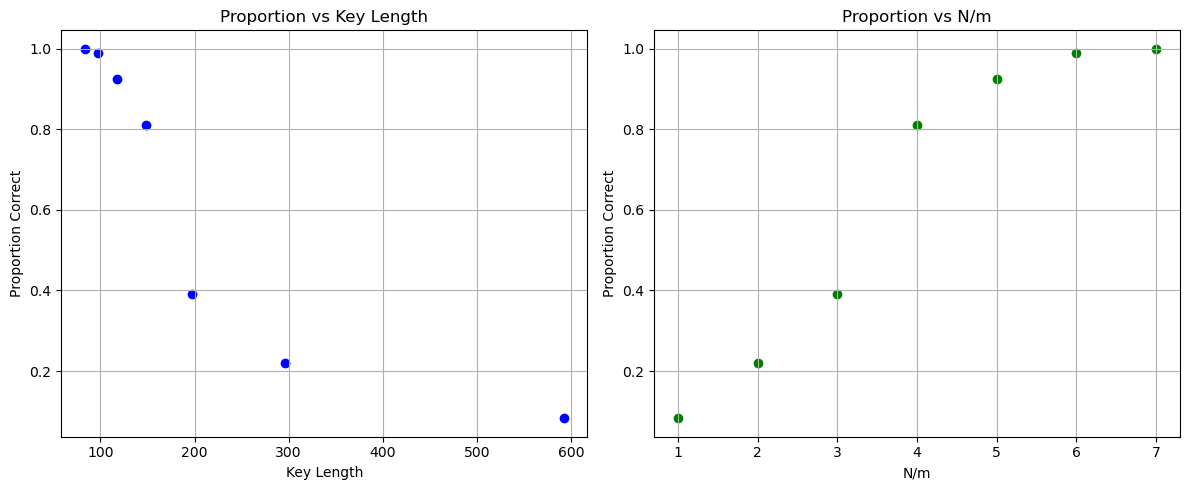

In [10]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot "Proportion correct" vs "Key length" in the first subplot.
axes[0].scatter(df.head(7)["Key length"], df.head(7)["Proportion correct"], color='blue')
axes[0].set_xlabel("Key Length")
axes[0].set_ylabel("Proportion Correct")
axes[0].set_title("Proportion vs Key Length")
axes[0].grid(True)

# Plot "Proportion correct" vs "N/m" in the second subplot.
axes[1].scatter(df.head(7)["N/m"], df.head(7)["Proportion correct"], color='green')
axes[1].set_xlabel("N/m")
axes[1].set_ylabel("Proportion Correct")
axes[1].set_title("Proportion vs N/m")
axes[1].grid(True)

plt.tight_layout()
plt.show()

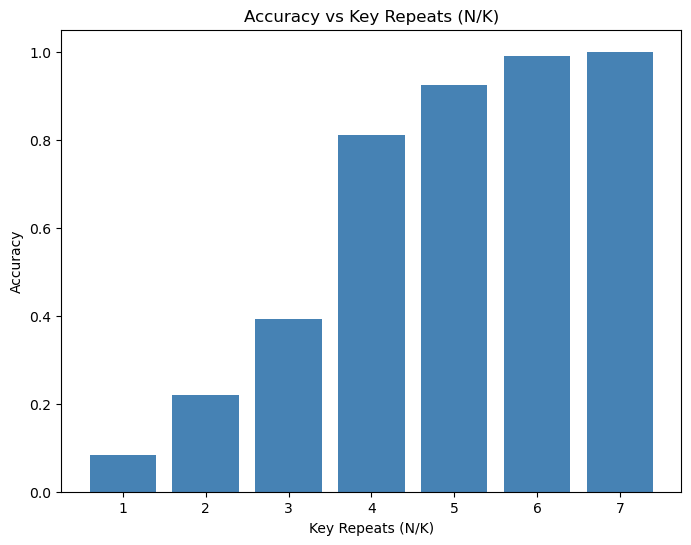

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Option 1: If you already have your DataFrame loaded in df
# Use only the first 7 rows (rows 0 through 6)
df_subset = df.head(7)

# Option 2: If you need to read from a CSV file "output_correctness.txt"
# Uncomment the following and adjust if needed:
#
# df = pd.read_csv("output_correctness.txt", sep=",")
# # Remove extra spaces from column names if necessary
# df.columns = [col.strip() for col in df.columns]
# df_subset = df.head(7)

# Create a bar plot for "Proportion correct" vs "N/m"
plt.figure(figsize=(8, 6))
plt.bar(df_subset["N/m"], df_subset["Proportion correct"], color='steelblue')
plt.xlabel("Key Repeats (N/K)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Key Repeats (N/K)")
plt.xticks(df_subset["N/m"])  # Ensure ticks show the N/m values
plt.show()


In [9]:
import pandas as pd

records = []
with open("output_correctness.txt", "r") as f:
    # Read the header line (which we won't use directly)
    header = f.readline().strip()
    # Process each subsequent line
    for line in f:
        line = line.strip()
        if line:  # skip empty lines
            # Each line is like: "Key length: 592, Correct count: 49, Proportion correct: 0.0828"
            parts = line.split(',')
            record = {}
            for part in parts:
                key_part, value_part = part.split(':')
                key = key_part.strip()
                value = value_part.strip()
                record[key] = value
            records.append(record)

# Create DataFrame from the list of dictionaries
df = pd.DataFrame(records)

# Convert columns to appropriate numeric types
df['Key length'] = df['Key length'].astype(int)
df['Correct count'] = df['Correct count'].astype(int)
df['Proportion correct'] = df['Proportion correct'].astype(float)
df['N/m'] = (592 / df['Key length']).astype(int)

# Display the DataFrame
print(df)

    Key length  Correct count  Proportion correct  N/m
0          592             49              0.0828    1
1          296            130              0.2196    2
2          197            232              0.3919    3
3          148            480              0.8108    4
4          118            547              0.9240    5
5           98            586              0.9899    6
6           84            592              1.0000    7
7           74            592              1.0000    8
8           65            592              1.0000    9
9           59            592              1.0000   10
10          53            592              1.0000   11
11          49            592              1.0000   12
12          45            592              1.0000   13
13          42            592              1.0000   14
14          39            592              1.0000   15
15          37            592              1.0000   16
16          34            592              1.0000   17
17        

In [28]:
P = {row['1-gram']: row['frequency'] for _, row in df_char_1.iterrows()}
Q = {tuple(row['2-gram']): row['frequency'] for _, row in df_char_2.iterrows()}

text = "Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal. Now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We are met on a great battle-field of that war. We have come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It is altogether fitting and proper that we should do this. But, in a larger sense, we can not dedicate—we can not consecrate—we can not hallow—this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It is rather for us to be here dedicated to the great task remaining before us—that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion—that we here highly resolve that these dead shall not have died in vain—that this nation, under God, shall have a new birth of freedom—and that government of the people, by the people, for the people, shall not perish from the earth."
text = text.lower()
text = "".join(a for a in text if a in alphabet)
key = "vigenere cipher markov chain metropolis scheme"
key = key.lower()
key = "".join(a for a in key if a in alphabet)
encoded_text = vigenere_cipher(text, key)

state_chain, energy_chain, best_key, best_energy = metropolis_hastings(encoded_text, P, Q, len(key), None, beta=0.5, n=10**5, return_chain=True)

decoded_text = vigenere_decipher(encoded_text, best_key)

print(f"Text: {text}")
print(f"Key: {key}")
print(f"Encoded text: {encoded_text}")
print(f"Best key: {best_key}")
print(f"Best energy: {best_energy}")
print(f"Decoded text: {decoded_text}")
print(f"Decoded: {decoded_text == text}")

100%|██████████| 110000/110000 [00:05<00:00, 19478.64it/s]

Text: four score and seven years ago our fathers brought forth on this continent a new nation conceived in liberty and dedicated to the proposition that all men are created equal now we are engaged in a great civil war testing whether that nation or any nation so conceived and so dedicated can long endure we are met on a great battlefield of that war we have come to dedicate a portion of that field as a final resting place for those who here gave their lives that that nation might live it is altogether fitting and proper that we should do this but in a larger sense we can not dedicatewe can not consecratewe can not hallowthis ground the brave men living and dead who struggled here have consecrated it far above our poor power to add or detract the world will little note nor long remember what we say here but it can never forget what they did here it is for us the living rather to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced it is ra

In [7]:
def running_key_cipher(text, key):
    """
    Encrypts a text using the Running Key cipher.

    Parameters:
        text (str): The text to encrypt.
        key (str): The key to use for encryption.
    
    Returns:
        str: The encrypted text.
    """
    alphabet = list("abcdefghijklmnopqrstuvwxyz ")
    sigma = np.ndarray(len(key), dtype=dict)

    for i, char in enumerate(key):
        j = alphabet.index(char)
        sigma[i] = {k: v for k, v in zip(alphabet, alphabet[j:] + alphabet[:j])}

    cipher = np.zeros(len(text), dtype=str)
    
    for i, char in enumerate(text):
        cipher[i] = sigma[i % len(key)].get(char)

    return "".join(cipher)

def running_key_decipher(text, key):
    """
    Decrypts a text using the Running Key cipher.

    Parameters:
        text (str): The text to decrypt.
        key (str): The key to use for decryption.
    
    Returns:
        str: The decrypted text.
    """
    alphabet = list("abcdefghijklmnopqrstuvwxyz ")
    sigma = np.ndarray(len(key), dtype=dict)

    for i, char in enumerate(key):
        j = len(alphabet) - alphabet.index(char)
        sigma[i] = {k: v for k, v in zip(alphabet, alphabet[j:] + alphabet[:j])}

    decipher = np.zeros(len(text), dtype=str)
    
    for i, char in enumerate(text):
        decipher[i] = sigma[i % len(key)].get(char)

    return "".join(decipher)

In [30]:
text = "hello world"
key = "hello world"

encoded_text = running_key_cipher(text, key)
decoded_text = running_key_decipher(encoded_text, key)

print(f"Text: {text}")
print(f"Key: {key}")
print(f"Encoded text: {encoded_text}")
print(f"Decoded text: {decoded_text}")

Text: hello world
Key: hello world
Encoded text: oiwwbzrbhwg
Decoded text: hello world


In [ ]:
def energy_function(encoded_text, key, P, Q):
    """"
    Computes the energy of a permutation for the running key cipher."
    
    Parameters:
        encoded_text (str): The encoded text.
        key (str): The key used for encoding.
        P (dict): The unigram probabilities.
        Q (dict): The bigram probabilities.

    Returns:
        float: The energy of the permutation.
    """
    decoded_text = running_key_decipher(encoded_text, key)

    epsilon = 1e-12
    energy = -math.log(P.get(decoded_text[0], epsilon))

    for j in range(len(decoded_text) - 1):
        bigram = (decoded_text[j], decoded_text[j+1])
        energy = energy - math.log(Q.get(bigram, epsilon))
    
    energy = energy - math.log(P.get(key[0], epsilon))

    for j in range(len(key) - 1):
        bigram = (key[j], key[j+1])
        energy = energy - math.log(Q.get(bigram, epsilon))
    
    return energy

def propose_key(key, m):
    """
    Proposes a new key by randomly changing m charactres of the current key.

    Parameters:
        key (str): The current key.
        m (int): The maximum number of characters to be changed.

    Returns:
        str: The proposed key.
    """
    alphabet = list("abcdefghijklmnopqrstuvwxyz ")
    key = list(key)

    m = random.randint(1, m)

    i = random.sample(range(len(key)), m)
    
    for k in range(m):
        j = random.randint(0, len(alphabet) - 1)
        key[i[k]] = alphabet[j]

    return "".join(key)

def metropolis_step(key, scrambled_text, P, Q, m=1, beta=1, old_energy=math.inf, old_keys=dict()):
    """
    Performs a single step of the Metropolis-Hastings algorithm.

    Parameters:
        key (str): The current key.
        scrambled_text (str): The scrambled text.
        P (dict): The unigram probabilities.
        Q (dict): The bigram probabilities.
        m (int): The maximum number of characters to be changed. Default is 1.
        beta (float): The inverse temperature. Default is 1.
        old_energy (float): The energy of the current deciphered text. Default is infinity.
        old_keys (dict): The previously visited keys. Default is an empty dictionary.

    Returns:
        str: The new key.
        float: The energy of the new deciphered test.
        dict: The updated dictionary of previously visited keys.
    """
    new_key = propose_key(key, m)
    
    if new_key in old_keys:
        new_energy = old_keys[new_key]
    else:
        new_energy = energy_function(scrambled_text, new_key, P, Q)
        old_keys[new_key] = new_energy

    E_delta = new_energy - old_energy

    if E_delta < 0 or random.random() < math.exp(-beta * E_delta):
        return new_key, new_energy, old_keys
    
    return key, old_energy, old_keys

def metropolis_hastings(scrambled_text, P, Q, key_length, key=None, m=1, beta=1, n=10**5, return_chain=False):
    """
    Runs the Metropolis-Hastings algorithm to decode a scrambled text.

    Parameters:
        scrambled_text (str): The scrambled text.
        P (dict): The unigram probabilities.
        Q (dict): The bigram probabilities.
        key_length (int): The length of the key.
        key (str): The initial key. Default is None (which becomes identity).
        m (int): The maximum number of characters to be changed. Default is 1.
        beta (float): The inverse temperature. Default is 1.
        n (int): The length of the chain to be returned. Default is 1e5.
        return_chain (bool): Whether to return the chain. Default is False.
    
    Returns:
        list: The chain of keys.
        list: The chain of energies.
        dict: The best key found.
        float: The energy of the best key.
    """
    if key is None:
        key = "a" * key_length

    energy = energy_function(scrambled_text, key, P, Q)
    old_keys = {key: energy}

    best_key = key
    best_energy = energy

    if return_chain:
        state_chain = [key]
        energy_chain = [energy]

        for _ in tqdm(range(n+10**4)):
            key, energy, old_keys = metropolis_step(key, scrambled_text, P, Q, m, beta, energy, old_keys)
            state_chain.append(key)
            energy_chain.append(energy)

            if energy < best_energy:
                best_key = key
                best_energy = energy
        
        return state_chain[10**4:], energy_chain[10**4:], best_key, best_energy

    for _ in tqdm(range(n+10**4)):
        key, energy, old_keys= metropolis_step(key, scrambled_text, P, Q, beta, m, energy, old_keys)

        if energy < best_energy:
            best_key = key
            best_energy = energy
    
    return None, None, best_key, best_energy

In [13]:
alphabet = list("abcdefghijklmnopqrstuvwxyz ")

text = "Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal."
text = text.lower()
text = "".join(a for a in text if a in alphabet)
key = "Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal. Now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We are met on a great battle-field of that war. We have come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It is altogether fitting and proper that we should do this. But, in a larger sense, we can not dedicate—we can not consecrate—we can not hallow—this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It is rather for us to be here dedicated to the great task remaining before us—that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion—that we here highly resolve that these dead shall not have died in vain—that this nation, under God, shall have a new birth of freedom—and that government of the people, by the people, for the people, shall not perish from the earth."
key = key.lower()
key = "".join(a for a in key if a in alphabet)
key = key[0:len(text)]

encoded_text = running_key_cipher(text, key)

P = {row['1-gram']: row['frequency'] for _, row in df_char_1.iterrows()}
Q = {tuple(row['2-gram']): row['frequency'] for _, row in df_char_2.iterrows()}

print(energy_function(encoded_text, key, P, Q))
print(energy_function(encoded_text, "a"*len(encoded_text), P, Q))

1759.613824691607
3728.341206023427


In [ ]:
P = {row['1-gram']: row['frequency'] for _, row in df_char_1.iterrows()}
Q = {tuple(row['2-gram']): row['frequency'] for _, row in df_char_2.iterrows()}

text = "Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal."
text = text.lower()
text = "".join(a for a in text if a in alphabet)
key = "Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal. Now we are engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We are met on a great battle-field of that war. We have come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It is altogether fitting and proper that we should do this. But, in a larger sense, we can not dedicate—we can not consecrate—we can not hallow—this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It is rather for us to be here dedicated to the great task remaining before us—that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion—that we here highly resolve that these dead shall not have died in vain—that this nation, under God, shall have a new birth of freedom—and that government of the people, by the people, for the people, shall not perish from the earth."
key = key.lower()
key = "".join(a for a in key if a in alphabet)
key = key[0:len(text)]

encoded_text = running_key_cipher(text, key)

state_chain, energy_chain, best_key, best_energy = metropolis_hastings(encoded_text, P, Q, len(key), key=None, m=1, beta=0.5, n=10**5, return_chain=True)

decoded_text = running_key_decipher(encoded_text, best_key)

print(f"Text: {text}")
print(f"Key: {key}")
print(f"Encoded text: {encoded_text}")
print(f"Best key: {best_key}")
print(f"Best energy: {best_energy}")
print(f"Decoded text: {decoded_text}")
print(f"Decoded: {decoded_text == text}")

100%|██████████| 110000/110000 [03:07<00:00, 585.12it/s]


Text: four score and seven years ago our fathers brought forth on this continent a new nation conceived in liberty and dedicated to the proposition that all men are created equal
Key: four score and seven years ago our fathers brought forth on this continent a new nation conceived in liberty and dedicated to the proposition that all men are created equal
Encoded text: kbnhzjebhiza gzjipi zviahjzambzbnhzkaloihjzchbnmolzkbhlozb zloqjzeb lq i lzaz irz alqb zeb eiqpigzq zwqcihlvza gzgigqealigzlbzloizdhbdbjqlqb zloalzawwzyi zahizehialigzifnaw
Best key: iloe sa pe m d edbea weair n w youe athe s ytou ar dooth ksimorbmeh urteat a tishath y wer frinad in or eahd u d wearmiheg li theme or wdarun alnt the heantre o eteed e gam
Best energy: 1810.4887076004368
Decoded text: cr d secte pad ffoe   ea t ong e ovlatheis fpounov houth sir a inavas he t a ha s iereadala sicid in i dehes had leg tteea au then ionconl in ldot ips re mire rieihed eghak
Decoded: False


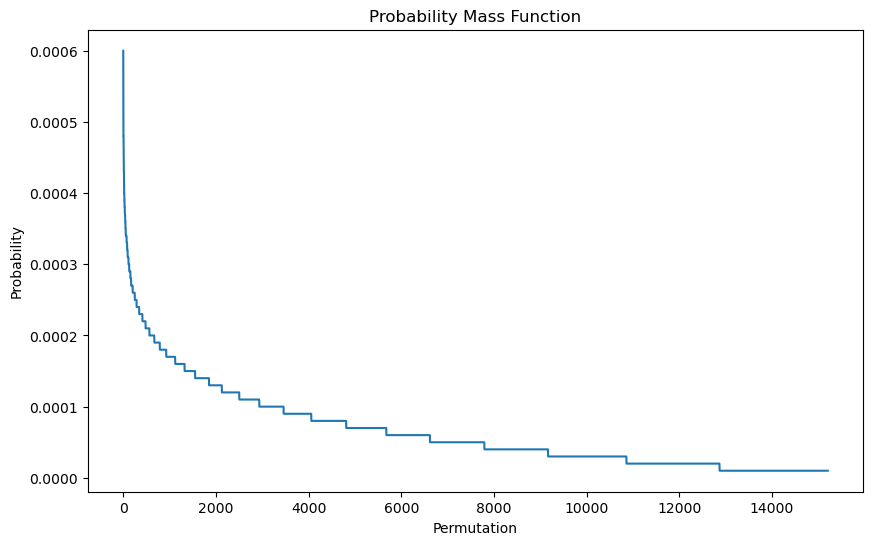

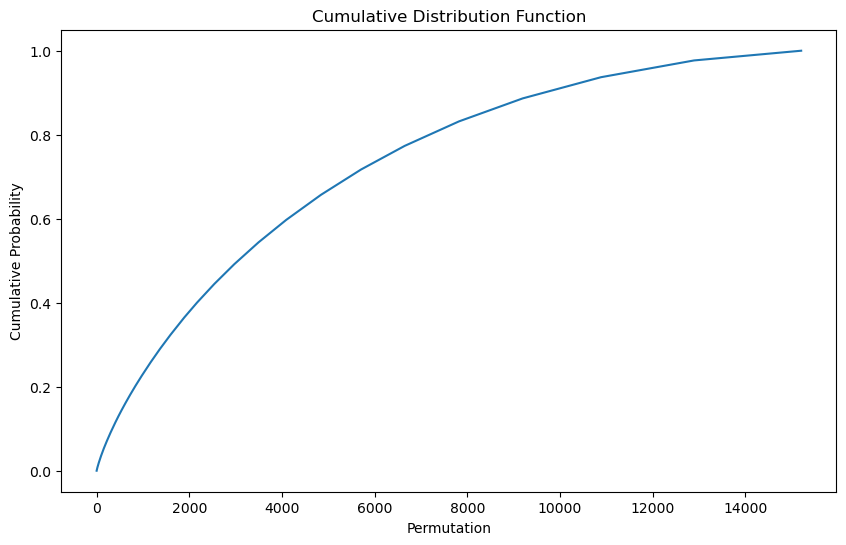

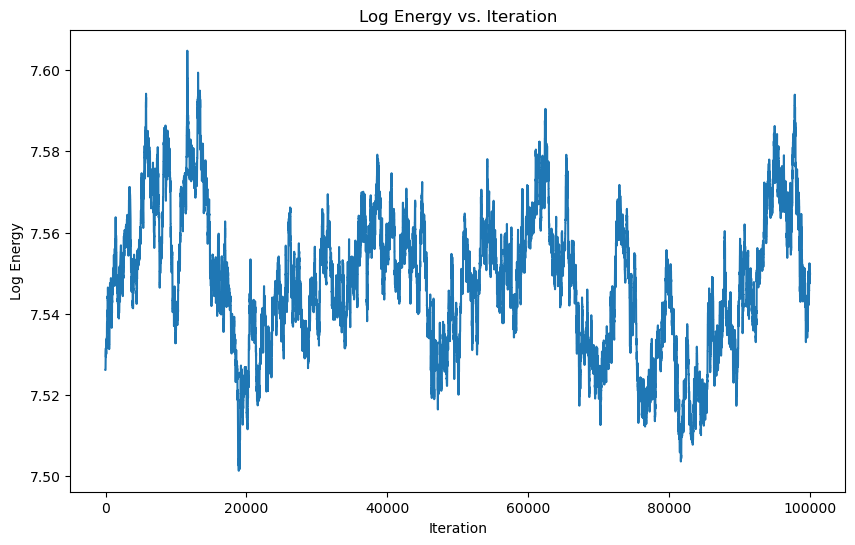

In [15]:
count = Counter(state_chain)
count = count.most_common(len(count))

pmf = []
cdf = []

for _, cnt in count:
    pmf.append(cnt / len(state_chain))
    cdf.append(sum(pmf))

plt.figure(figsize=(10, 6))
plt.plot(range(len(count)), pmf)
plt.xlabel("Permutation")
plt.ylabel("Probability")
plt.title("Probability Mass Function")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(len(count)), cdf)
plt.xlabel("Permutation")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function")
plt.show()

energy_chain = np.array(energy_chain)
energy_chain = np.log(energy_chain)

plt.figure(figsize=(10, 6))
plt.plot(energy_chain)
plt.xlabel("Iteration")
plt.ylabel("Log Energy")
plt.title("Log Energy vs. Iteration")
plt.show()

In [16]:
df_count = pd.DataFrame(count, columns=["state", "count"])
df_count.head()

,state,count
0,pou ha reve ureelr geso g in icke sbeases puc...,60
1,sotd inkmedowgoohelarritis ane yod entan g rdr...,53
2,sowo yaprs pulyeeds lan g ins yop tt oppo wdr...,51
3,hcad ce fidano orisaldenng ie rad timus d sih...,49
4,hen wk aralysa tedin tandg ine shoodotheir ski...,48


In [21]:
P = {row['1-gram']: row['frequency'] for _, row in df_char_1.iterrows()}
Q = {tuple(row['3-gram']): row['frequency'] for _, row in df_word_3.iterrows()}

text = "On an exceptionally hot evening early in July a young man came out of the garret in which he lodged in S. Place and walked slowly, as though in hesitation, towards K. bridge."
text = text.lower()
text = "".join(a for a in text if a in alphabet)
key = text

encoded_text = running_key_cipher(text, key)

state_chain, energy_chain, best_key, best_energy = metropolis_hastings(encoded_text, P, Q, len(key), key=None, m=1, beta=0.5, n=10**5, return_chain=True)

decoded_text = running_key_decipher(encoded_text, best_key)

print(f"Text: {text}")
print(f"Key: {key}")
print(f"Encoded text: {encoded_text}")
print(f"Best key: {best_key}")
print(f"Best energy: {best_energy}")
print(f"Decoded text: {decoded_text}")
print(f"Decoded: {decoded_text == text}")

100%|██████████| 110000/110000 [02:13<00:00, 824.14it/s] 

Text: on an exceptionally hot evening early in july a young man came out of the garret in which he lodged in s place and walked slowly as though in hesitation towards k bridge
Key: on an exceptionally hot evening early in july a young man came out of the garret in which he lodged in s place and walked slowly as though in hesitation towards k bridge
Encoded text: b za ziteidlqb awwvzoblzipi q mziahwvzq zsnwvzazvbn mzya zeayizbnlzbkzloizmahhilzq zroqeozoizwbgmigzq zjzdwaeiza gzrawuigzjwbrwvzajzlobnmozq zoijqlalqb zlbrahgjzuzchqgmi
Best key:  zztmficwixviogafapraiouabp bliiou ibzjiouaohfarhinyeleaxrrhydbjupiouadapziouares vtgrvxafoiouawvatfimfjsiouiouastfrtiaiouaiouaioua dainbglx slsbcsaprgmkbudhhqiouaiouasc
Best energy: 8221.00256061217
Decoded text: cbaiouarjahriouarwgiouyfiouappervhiouahslzniouaiouaciouadiouafytuxrorziouaenohshhrfglywiouaalcblsiouiouahwihxvfaiouaiouatfjooywnlhj ioualiouahdriouax wopkiouarblazvuxgvg
Decoded: False


In [17]:
def energy_function(encoded_text, key, P, Q):
    """"
    Computes the energy of a permutation for the running key cipher."
    
    Parameters:
        encoded_text (str): The encoded text.
        key (str): The key used for encoding.
        P (dict): The unigram probabilities.
        Q (dict): The bigram probabilities.

    Returns:
        float: The energy of the permutation.
    """
    decoded_text = running_key_decipher(encoded_text, key)

    epsilon = 1e-12
    energy = -math.log(P.get(decoded_text[0], epsilon))

    for j in range(len(decoded_text) - 2):
        trigram = (decoded_text[j], decoded_text[j+1], decoded_text[j+2])
        energy = energy - math.log(Q.get(trigram, epsilon))
    
    energy = energy - math.log(P.get(key[0], epsilon))

    for j in range(len(key) - 2):
        trigram = (key[j], key[j+1], key[j+2])
        energy = energy - math.log(Q.get(trigram, epsilon))
    
    return energy

In [22]:
print(energy_function(encoded_text, key, P, Q))
print(energy_function(encoded_text, "a"*len(encoded_text), P, Q))

9234.166373669732
9235.914085795726
